# Attack scenario implementation in Gitcoin Collusion Studies
This is a notebook with a simple implementation of different type of attack vectors. Detailed conceptual and math reasoning can be found in [this presentation slides](https://drive.google.com/file/d/1Y68YnHIybMNLDUSgGc_Q_Um_6FbVbElh/view?usp=sharing)
*access is restricted to BlockScience Internal view only*

## 1. Brief Introduction
### Optimality Gap Mechanism Overview
Our current proposed solution in the Gitcoin resarch collaboration project is to: 
Define community subgraph -> Find optimal funding scheme by changing the connectivity within the community to produce the maximum amount of matching funds -> Report/Flag Collusion if threshold for optimization is above a specified amount

In QF funding collusion problem, the colluder's goal is to **attract as much matching fund as possible with limited original funding**, thus, our goal is to detect what group of users are attracting matching funds most efficiently by calculating the gap between maximun value of funds attracted and actual funds attracted.

### Benchmarking 

Thoeretically our solution can detect all efficient funding matching schemes, among which might be effective illegal collusion, and likely some efficient organic community coordination. To further illustrate our point, we want to showcase how our algorithm can catch existing as well as hypothetical scenarios for collusion.

Here we constructed several different collusion scenarios **based on Gitcoin Funding Report** and other mathematically possible ways to exploit native QF and pairwise funding scheme. 

## 2.Basic generating function
This section is some hand-coded set up for agent-based simulation of attack vectors in the Gitcoin Grants system. 

This simulation has two types of agents: grants and contributors. Grants can receive funds and contributors can give fund to grants. They all have a variable "fund" to keep track of how much money they have as a system state.

We then create a network with a set of users and grants, with rules to specify how it should connect.

Finally, for easy access, I use a dictionary to keep track of the users and grants by their index. The index starts from 0, first labelling all grants and then contributors. For example, in a network with 2 grants and 5 contributors, the grants index are 0 and 1, and the user index will be from 3 to 7.

This simple simulation **does not keep track of time**.

In [64]:
#Element Testing
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [65]:
#make agents
class grant:
    def __init__(self , i, f=0):
        self.type = "grants"
        self.index = i 
        self.fund = f      
    
    def receive(self, i):
        self.fund += i 

    def change_fund(self,x):
        self.fund = x

class user:
    def __init__(self,i,f=0):
        self.type = "users"
        self.index = i #to keep track of the networkX property
        self.fund = f #volum of money avliable or received
        
    def give(self, i, grant):
        self.fund -= i
        grant.receive(i)
        return(self.index)
    
    def change_fund(self,x):
        self.fund = x

In [66]:
#make topology
## the idea is to construct a graph with a unique index for each node 
## then allow agents to interact with each other

In [73]:
#initialize nwetwork
def initialize_network(network, grant_set, user_set):
    directory = {}
    #grant first, user next
    for i in grant_set:
        directory.update({i:grant(i)})
    for i in user_set:
        directory.update({i:user(i)})
    return(directory)

#assign initial funding situation
def add_fund(directory,grant_set, user_set,grant_money,user_money):
    for i in grant_set:
        grant_a =  directory.get(i)
        grant_a.change_fund(grant_money[i])
    extra = len(grant_set)
    for i in user_set:
        user_a = directory.get(i)
        user_a.change_fund(user_money[i-extra])


In [ ]:
#initialize network, add fund and then give funds

## 3. Collusion with fake accounts or friends
This type of collusion is primarily having a lot of coordinated users donate to the same big project. In practice, this can be creating a large number of fake accounts (which is tackled by sybil detection), or coordinating a large group on telegram or other more advanced coordination mechanism that could involve stake, or even spliting money among a large group of friends.

According to QF and pair-wise funding mechanism, this type of attack attracts the largest amount of matching funds by spliting the money evenly and into smallest portion possible. Hypothetically, optimality gap shall allow calcualtion **based on changing numbers of total account with fixed amount of funding** on top of the current implimentation to be able to detect thsi type of collusion.

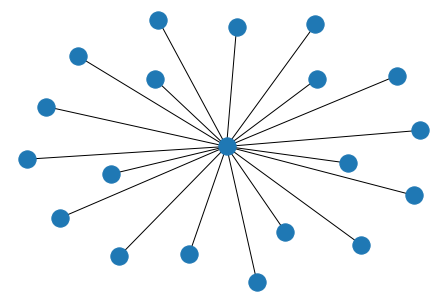

In [68]:
#one grand vis
grants  =  {0}
tot = set(range(20))
users = tot.difference(grants)

G = nx.Graph()
G.add_nodes_from(tot)

for i in users:
     G.add_edge(0,i)
# can also be G = nx.star_graph(20)
pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()
        

In [74]:
#initialize network agents
di = initialize_network(G,grants,users)

In [75]:
#initialize money
grant_money = [0]
user_money = []
for i in range(len(users)):
    user_money.append(100)

add_fund(di,grants,users,grant_money,user_money)

In [82]:
#pay
grant_a = di.get(0)
for i in users:
    user_a = di.get(i)
    user_a.give(50,grant_a)
    


In [83]:
for i in range(20):
    print(di.get(i).fund,di.get(i).type)

950 grants
50 users
50 users
50 users
50 users
50 users
50 users
50 users
50 users
50 users
50 users
50 users
50 users
50 users
50 users
50 users
50 users
50 users
50 users
50 users


In [67]:
# TODO visualize again with color and label
# TODO run optimality gap algorithm on it
# TODO turn this into a proper blog-postable material or do a live coding demo

## 4. Collusion with multiple small/fake projects


In [133]:
#initialize grants as sets
grants  =  set(range(3))
tot = set(range(12))
users = tot.difference(grants)

In [134]:
edge_list = [(0,3),(0,4),(0,5),(0,6),(1,6),(1,7),(1,8),(1,9),(2,9),(2,10),(2,11)]


In [135]:
#make graph
from networkx.algorithms import bipartite

G2 = nx.Graph()
# Add nodes with the node attribute "bipartite"
G2.add_nodes_from(grants,bipartite=0)
G2.add_nodes_from(users,bipartite=1)
# Add nodes with the node attribute "bipartite"
G2.add_edges_from(edge_list)


In [136]:
color_dic = nx.bipartite.color(G2)
color_map = []
for i in range(12):
    if color_dic.get(i) == 1:
        color_map.append('#ED553B') # red
    else:
        color_map.append('#3CAEA3') # green 

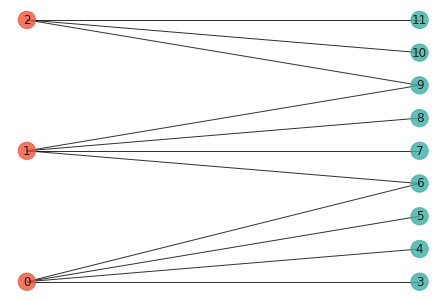

In [137]:
#And I made it pretty
top = nx.bipartite.sets(G2)[0]
pos = nx.bipartite_layout(G2, top)

nx.draw(G2,pos, with_labels=True , node_size=300,node_color=color_map,alpha = 0.8)
plt.show()

In [138]:
#initialize network agents
di2 = initialize_network(G2,grants,users)

In [139]:
#initialize money
grant_money = [0,0,0]
user_money = []
for i in range(len(users)):
    user_money.append(100)

add_fund(di2,grants,users,grant_money,user_money)

In [143]:
#pay
for i in edge_list:  
    grant_a = di2.get(i[0])
    user_a = di2.get(i[1])  
    user_a.give(10,grant_a)

In [144]:
for i in range(12):
    print(di2.get(i).fund,di2.get(i).type)

40 grants
40 grants
30 grants
80 users
80 users
80 users
60 users
80 users
80 users
60 users
80 users
80 users


In [ ]:
# TODO visualize again with color and label
# TODO run optimality gap algorithm on it
# TODO turn this into a proper blog-postable material or do a live coding demo

## 5. Futher Implication: two major type of collusion generation: connectivity and account numbers
As I explored earlier in this example, the Optimality Gap mechanism can catch both scenario